In [1]:
from temperature_analysis import *

# TEMPERATURE_WILDFIRE analaysis for a particular year

In [2]:
#create fire_df which is a dataframe containing all wildfire information
PATH = '../../Final Project/188-million-us-wildfires/FPA_FOD_20170508.sqlite'
fire_df = create_wildfire_df(PATH)

In [3]:
###Get coordinates where fires are really large only.. In state of AK.
coords = large_fire_coord('AK',10000,fire_df)

In [4]:
##Create cube_local which is cube extracted for same coords as wildfire.
PATH_temp = os.path.join(os.getcwd(), "../../Final Project/air.mon.mean.nc")
cube_temp = iris.load_cube(PATH_temp)
cat.add_categorised_coord(cube_temp, 'year', 'time', get_year)
cat.add_categorised_coord(cube_temp, 'month', 'time', get_month)
cube_local = region_based_cube(cube_temp,coords)


C:\Users\payal\Anaconda4\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
C:\Users\payal\Anaconda4\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'month'.
  warnings.warn(msg.format(self.name()))
C:\Users\payal\Anaconda4\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'year'.
  warnings.warn(msg.format(self.name()))
C:\Users\payal\ECE143\ECE143_Project\Local Notebooks\temperature_analysis.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_new['fire_total_mo

Inital 1880465
Particular Year & location 123
Sum over months in year 121


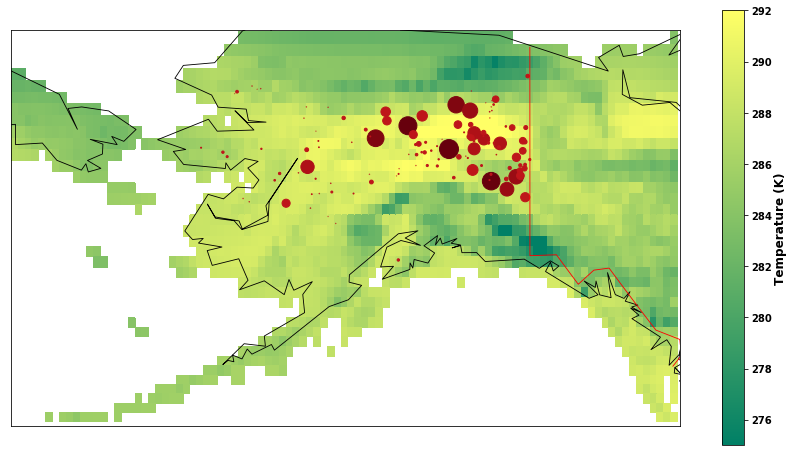

In [6]:
##Create a map for any year
create_map(2004,coords,cube_local,fire_df)

# TEMPERATURE_WILDFIRE analaysis for a several years

In [7]:
fire_time_based = process_df_local(coords,fire_df)
fire_time_based = fire_time_based.rename(columns={"fire_year": "year", "fire_month": "month"})

C:\Users\payal\ECE143\ECE143_Project\Local Notebooks\temperature_analysis.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_new['fire_total_area'] = df_new.groupby(['fire_year','fire_month'])['fire_total'].transform(sum)


In [8]:
PATH_temp = os.path.join(os.getcwd(), "../../Final Project/air.mon.mean.nc")
cube_temp = iris.load_cube(PATH_temp)
cube_local = region_based_cube(cube_temp,coords)

In [9]:
cube_max = cube_local.collapsed(['latitude','longitude'], iris.analysis.MAX)

C:\Users\payal\Anaconda4\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
C:\Users\payal\Anaconda4\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


In [10]:
##Get 
df = cube_to_df(cube_max)
result = pd.merge(df, fire_time_based, on=['year', 'month'],how='left')
result.fillna(0,inplace=True)

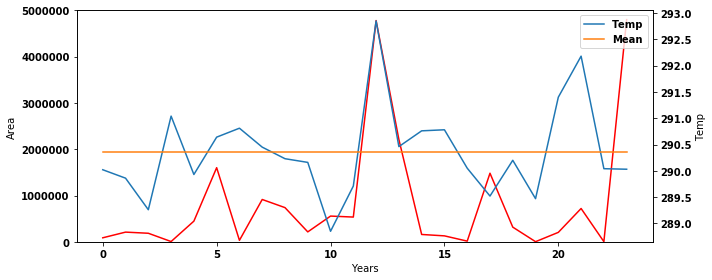

In [11]:
create_plt(6,result)

# RAINFALL ANALYSIS

In [12]:
from iris.time import PartialDateTime
PATH = os.path.join(os.getcwd(), "../../Final Project/precip.mon.mean.nc")
rain_cube = iris.load_cube(PATH)


C:\Users\payal\Anaconda4\lib\site-packages\iris\coords.py:1410: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


Inital 1880465
Particular Year & location 123
Sum over months in year 121


C:\Users\payal\ECE143\ECE143_Project\Local Notebooks\temperature_analysis.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_new['fire_total_month'] = df_new.groupby(['LATITUDE','LONGITUDE', 'fire_year'])['fire_total'].transform(sum)


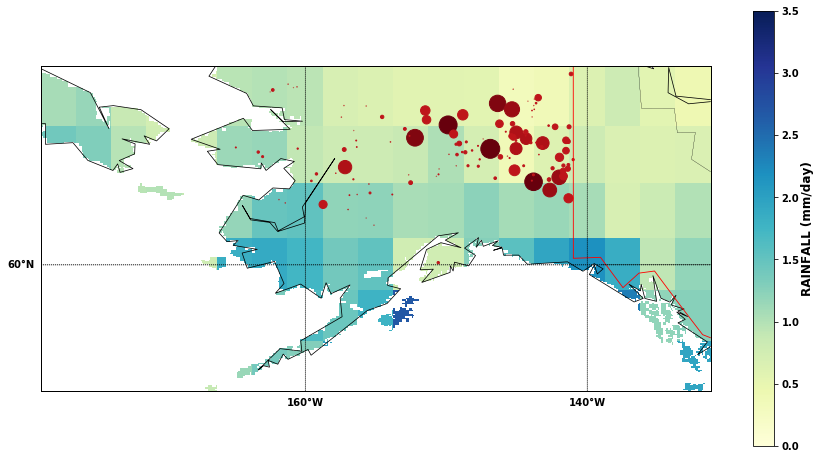

In [13]:
plot_rainfall(5,7,2004,rain_cube,fire_df,coords)